In [6]:
import biotite
import biotite.structure as struc
import biotite.structure.io as strucio
import biotite.structure.io.xtc as xtc
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def rmsd(filePath,refName,colorList,temperature,save_path):
    plt.figure(figsize=(8, 6)) 
    for i in range(1,3):
        template = strucio.load_structure(filePath +"/" + refName + ".pdb")
        protein_mask = struc.filter_amino_acids(template)
        template = template[protein_mask]
        xtc_file = xtc.XTCFile.read(filePath + temperature +"/400_"+ str(i) + ".xtc", atom_i=np.where(protein_mask)[0])
        trajectory = xtc_file.get_structure(template)
        trajectory = struc.remove_pbc(trajectory)
        trajectory, transform = struc.superimpose(trajectory[0], trajectory)
        rmsd = struc.rmsd(trajectory[0], trajectory)
#         print(rmsd[0])
#         print(len(rmsd))
        plt.plot(rmsd, color=colorList[i - 1],linewidth=0.36,label="R" + str(i))
    plt.xlim(0,10100)
    plt.ylim(0,10)
    plt.xticks(range(0,10100,1000),range(0,101,10),fontsize=18,fontweight="bold")
    plt.yticks(fontsize=18,fontweight="bold")
    plt.xlabel('Time (ns)', family='Times New Roman',weight='bold',fontsize=22)
    plt.ylabel('RMSD (Å)', family='Times New Roman',weight='bold', fontsize=22)
    plt.legend(loc="lower right",ncol=3, prop = {'size':18})
    plt.savefig(save_path + temperature +"_sup.png",format='png',dpi=600)
    plt.show()

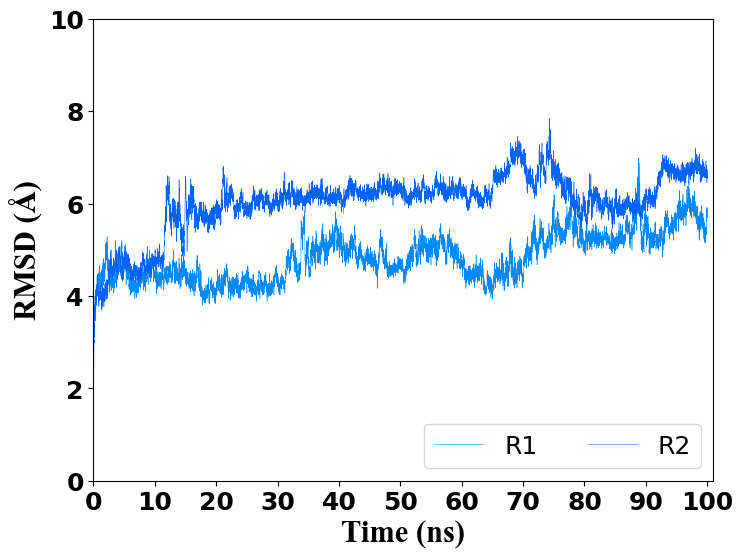

In [8]:
# m1_color      #FF6040 #FF3E27 #E90C0C 
# ty1_color     #0089FF #0062FF #130CE9 

filePath = "C:/Users/17351/Downloads/md/TY1/"
save_path = "C:/Users/17351/Desktop/protein_fram/G11/Figs/rmsd/TY1/"
refName = "TY1"
colorList = ['#0089FF', '#0062FF', '#130CE9']
temperature = "400k"
rmsd(filePath,refName,colorList,temperature,save_path)